## <div style="text-align:center">Analisis Exploratorio de Datos</div>

### Importar las librerias a utilizar

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scrap_dolar import dolar
import warnings
import os
from dotenv import load_dotenv
warnings.catch_warnings(action="ignore")
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

#### Lectura de los Datasets a trabajar

In [63]:
# Cantidad de personas que tienen acceso a cierta tecnologica, dividido por provincias, año y trimestre
df_acceso_tech = pd.read_excel("../datasets/acceso_por_tecnologia.xlsx")

# Cantidad de personas que tienen acceso a cierta velocidad de internet, dividido por provincias, año y trimestre
df_acceso_vel = pd.read_excel("../datasets/acceso_vel.xlsx")

# Totales de accesos a internet desglosados por velocidad de conexión.
df_total_vel = pd.read_excel("../datasets/acceso_total_vel.xlsx")

# Ingresos por trimestre y año
df_ingresos = pd.read_excel("../datasets/ingresos.xlsx")

# Número de accesos a Internet por cada 100 hogares en la provincia
df_penetracion_hogares = pd.read_excel("../datasets/penetracion_hogares.xlsx")

# Número de accesos a Internet por cada 100 habitantes de la provincia
df_penetracion_poblacion = pd.read_excel("../datasets/penetracion_poblacion.xlsx")

# Totales de velocidad media descargada (VMD).
df_total_vmd = pd.read_excel("../datasets/series_temp.xlsx")

# Velocidad promedio por provincia
df_vel_prom_prov = pd.read_excel("../datasets/vel_media_prov.xlsx")

# Combinacion de df_penetracion_poblacion  y df_penetracion_hogares
df_penetracion_total = pd.read_excel("../datasets/penetracion_total.xlsx")

# Total acceso a la tecnologia
df_total_tech = pd.read_excel("../datasets/total_acceso_tech.xlsx")

# Accesos dial-up y Banda Ancha Fija (BAf) por provincia, año y trimestre.
df_dial_baf = pd.read_excel("../datasets/dial_baf.xlsx")

# Totales de accesos dial-up y Banda Ancha Fija (BAf).
df_total_dial_baf = pd.read_excel("../datasets/total_dial_baf.xlsx")


#### Visualizacion de registros nulos

In [64]:
# df_acceso_tech cuenta con valores de tipo string donde deberian ser int. Estos datos estan en la columna trimestre y año
num_map={
    "1 *":"1",
    "2 *":"2",
    "3 *":"3",
    "4 *":"4"
}
print(f"Registros Acceso a tecnologia:{df_acceso_tech.shape[0]}\n")
df_acceso_tech.info()
print("Nulos: \n",df_acceso_tech[df_acceso_tech["Total"].isna()])
df_acceso_tech.dropna(inplace=True)
df_acceso_tech["Año"] = df_acceso_tech["Año"].replace("2019 *","2019").astype(int) # Cambio a tipo de dato int las columnas "Año" y "Trimestre"
df_acceso_tech["Trimestre"] = df_acceso_tech["Trimestre"].replace(num_map).astype(int)

Registros Acceso a tecnologia:962

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           961 non-null    object 
 1   Trimestre     961 non-null    object 
 2   Provincia     960 non-null    object 
 3   ADSL          960 non-null    float64
 4   Cablemodem    960 non-null    float64
 5   Fibra óptica  960 non-null    float64
 6   Wireless      960 non-null    float64
 7   Otros         960 non-null    float64
 8   Total         960 non-null    float64
dtypes: float64(6), object(3)
memory usage: 67.8+ KB
Nulos: 
      Año                                          Trimestre Provincia  ADSL  \
960  NaN                                                NaN       NaN   NaN   
961    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
960         NaN           NaN   

In [65]:
print(f"Registros Acceso Total a tecnologia:{df_total_tech.shape[0]}\n")
df_total_tech.info()

Registros Acceso Total a tecnologia:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           40 non-null     int64 
 1   Trimestre     40 non-null     int64 
 2   ADSL          40 non-null     int64 
 3   Cablemodem    40 non-null     int64 
 4   Fibra óptica  40 non-null     int64 
 5   Wireless      40 non-null     int64 
 6   Otros         40 non-null     int64 
 7   Total         40 non-null     int64 
 8   Periodo       40 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.9+ KB


In [66]:
print(f"Registros Acceso a velocidad (por provincia):{df_acceso_vel.shape[0]}\n")
df_acceso_vel.info()
df_acceso_vel["OTROS"].fillna(0,inplace=True)

Registros Acceso a velocidad (por provincia):960

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  960 non-null    int64  
 1   Trimestre            960 non-null    int64  
 2   Provincia            960 non-null    object 
 3   HASTA 512 kbps       960 non-null    float64
 4   + 512 Kbps - 1 Mbps  960 non-null    float64
 5   + 1 Mbps - 6 Mbps    960 non-null    float64
 6   + 6 Mbps - 10 Mbps   960 non-null    float64
 7   + 10 Mbps - 20 Mbps  960 non-null    float64
 8   + 20 Mbps - 30 Mbps  960 non-null    float64
 9   + 30 Mbps            960 non-null    float64
 10  OTROS                954 non-null    float64
 11  Total                960 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 90.1+ KB


In [67]:
print(f"Registros Acceso total a velocidad:{df_total_vel.shape[0]}\n")
df_total_vel.info()

Registros Acceso total a velocidad:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      40 non-null     int64
 1   Trimestre                40 non-null     int64
 2   Hasta 512 kbps           40 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  40 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    40 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   40 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  40 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  40 non-null     int64
 8   Más de 30 Mbps           40 non-null     int64
 9   OTROS                    40 non-null     int64
 10  Total                    40 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB


In [68]:
print(f"Registros Ingresos:{df_ingresos.shape[0]}\n")
df_ingresos.info()

Registros Ingresos:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Periodo                    40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [69]:
print(f"Registros Penetracion Hogares:{df_penetracion_hogares.shape[0]}\n")
df_penetracion_hogares.info()

Registros Penetracion Hogares:960

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   Accesos por cada 100 hogares  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [70]:
print(f"Registros Penetracion Poblacion:{df_penetracion_poblacion.shape[0]}\n")
df_penetracion_poblacion.info()

Registros Penetracion Poblacion:960

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       960 non-null    int64  
 1   Trimestre                 960 non-null    int64  
 2   Provincia                 960 non-null    object 
 3   Accesos por cada 100 hab  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [71]:
print(f"Registros Penetracion Total (poblacion y hogares):{df_penetracion_total.shape[0]}\n")
df_penetracion_total.info()

Registros Penetracion Total (poblacion y hogares):40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           40 non-null     int64  
 1   Trimestre                     40 non-null     int64  
 2   Accesos por cada 100 hogares  40 non-null     float64
 3   Accesos por cada 100 hab      40 non-null     float64
 4   Periodo                       40 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


In [72]:
print(f"Registros Total media de bajada:{df_total_vmd.shape[0]}\n")
df_total_vmd.info()
df_total_vmd.rename(columns={"Trimestre.1":"Periodo"},inplace=True)

Registros Total media de bajada:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     40 non-null     int64  
 1   Trimestre               40 non-null     int64  
 2   Mbps (Media de bajada)  40 non-null     float64
 3   Trimestre.1             40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [73]:
print(f"Registros media de bajada por provincia:{df_vel_prom_prov.shape[0]}\n")
df_vel_prom_prov.info()

Registros media de bajada por provincia:960

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.1+ KB


In [74]:
print(f"Registros Accesos Dial-up y Banda Ancha Fija:{df_dial_baf.shape[0]}\n")
df_dial_baf.info()

Registros Accesos Dial-up y Banda Ancha Fija:960

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               960 non-null    int64  
 1   Trimestre         960 non-null    int64  
 2   Provincia         960 non-null    object 
 3   Banda ancha fija  960 non-null    int64  
 4   Dial up           958 non-null    float64
 5   Total             960 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 45.1+ KB


In [75]:
print(f"Registros Total Accesos Dial-up y Banda Ancha Fija:{df_total_dial_baf.shape[0]}\n")
df_total_dial_baf.info()

Registros Total Accesos Dial-up y Banda Ancha Fija:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               40 non-null     int64 
 1   Trimestre         40 non-null     int64 
 2   Banda ancha fija  40 non-null     int64 
 3   Dial up           40 non-null     int64 
 4   Total             40 non-null     int64 
 5   Periodo           40 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


#### Observaciones:
- En los datasets presentes, solo contamos pocos valores nulos, los cuales fueron eliminados (si observamos la hoja de excel `Acceso por tecnologia` del dataset original `internet`, los datos nulos son aclaraciones al final de la tabla, escritas por la persona que ha cargado los datos) o cambiados por 0 (como es el caso de `df_acceso_vel`). La carencia de valores nulos es de mucha ayuda al momento de registrar tendencias y patrones.

### <i>Describe()</i> de variables numericas

In [76]:
df_acceso_tech.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,960.000000,960.000000,9.600000e+02,9.600000e+02,9.600000e+02,960.00000,960.000000,9.600000e+02
mean,2018.500000,2.500000,1.171007e+05,1.816350e+05,4.428212e+04,12071.28750,6451.996875,3.615411e+05
std,2.873778,1.118617,2.411026e+05,4.461057e+05,1.681546e+05,20544.30774,11192.518329,7.778954e+05
min,2014.000000,1.000000,3.296000e+03,0.000000e+00,0.000000e+00,0.00000,2.000000,1.255700e+04
25%,2016.000000,1.750000,2.123025e+04,1.054450e+04,3.470000e+02,676.00000,330.000000,5.900025e+04
50%,2018.500000,2.500000,4.547550e+04,3.967000e+04,2.541000e+03,4947.00000,1881.000000,1.111385e+05
75%,2021.000000,3.250000,9.190500e+04,7.549325e+04,2.347675e+04,13694.25000,7278.750000,1.883518e+05
max,2023.000000,4.000000,1.586343e+06,2.797700e+06,1.784593e+06,138405.00000,73415.000000,5.011620e+06


In [77]:
df_acceso_vel.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,960.000000,960.000000,960.000000,960.000000,9.600000e+02,960.000000,960.000000,960.000000,9.600000e+02,960.000000,9.600000e+02
mean,2018.525000,2.500000,1986.276042,9291.107292,1.371885e+05,38112.431250,37303.288542,20197.090625,1.098851e+05,6043.608333,3.600074e+05
std,2.916888,1.118617,12889.165297,21018.938200,3.281748e+05,64565.358974,89536.515407,70534.758485,4.347858e+05,14503.710948,7.740852e+05
min,2014.000000,1.000000,6.000000,0.000000,1.483000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,40.750000,347.250000,2.451150e+04,3581.000000,2127.500000,36.750000,1.075000e+01,0.000000,5.882400e+04
50%,2018.500000,2.500000,107.000000,2263.500000,4.425400e+04,12913.500000,10082.000000,1391.500000,2.418500e+03,58.000000,1.097050e+05
75%,2021.000000,3.250000,468.000000,7227.500000,8.439500e+04,40126.000000,26436.000000,9858.750000,3.533225e+04,6485.250000,1.880792e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.042646e+06,122762.000000,5.011620e+06


In [78]:
df_total_vel.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,40.000000,40.000000,40.0000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,4.000000e+01
mean,2018.525000,2.500000,47670.6250,222986.575000,3.292524e+06,9.146983e+05,8.952789e+05,4.847302e+05,2.637241e+06,145046.600000,8.640177e+06
std,2.952509,1.132277,49981.9869,194006.387383,1.497346e+06,2.351130e+05,4.602764e+05,4.434259e+05,2.959224e+06,129164.653258,1.696189e+06
min,2014.000000,1.000000,5675.0000,28521.000000,9.002530e+05,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,30132.5000,77489.250000,2.545490e+06,8.438092e+05,6.962432e+05,1.119172e+05,3.052150e+04,0.000000,7.144003e+06
50%,2018.500000,2.500000,36230.0000,198451.000000,3.327425e+06,9.848485e+05,8.029080e+05,4.222760e+05,8.691535e+05,165319.000000,8.560895e+06
75%,2021.000000,3.250000,41087.5000,316865.000000,4.848150e+06,1.060943e+06,1.061018e+06,6.049265e+05,4.733012e+06,237051.750000,9.918698e+06
max,2024.000000,4.000000,241713.0000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,8.224736e+06,414754.000000,1.154766e+07


In [79]:
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,40.000000,40.000000,4.000000e+01
mean,2018.750000,2.500000,3.281153e+07
std,3.642696,1.132277,3.850304e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.750000,6.817891e+06
50%,2018.500000,2.500000,1.842255e+07
75%,2021.000000,3.250000,3.942974e+07
max,2033.000000,4.000000,1.673760e+08


- Ingresos cuenta con un valor atípico en la columna `Año` que luego será corregido.

In [80]:
df_penetracion_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405
std,2.873778,1.118617,23.898192
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.750000,32.856870
50%,2018.500000,2.500000,48.817167
75%,2021.000000,3.250000,65.116858
max,2023.000000,4.000000,124.061394


In [81]:
df_penetracion_poblacion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,15.394079
std,2.873778,1.118617,9.168959
min,2014.000000,1.000000,2.684669
25%,2016.000000,1.750000,8.764189
50%,2018.500000,2.500000,13.417453
75%,2021.000000,3.250000,19.657928
max,2023.000000,4.000000,52.236739


In [82]:
df_total_vmd.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,34.341500
std,2.908872,1.132277,38.280484
min,2014.000000,1.000000,3.617127
25%,2016.000000,1.750000,5.809965
50%,2018.500000,2.500000,16.665000
75%,2021.000000,3.250000,46.337500
max,2023.000000,4.000000,139.040000


In [83]:
df_vel_prom_prov.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,21.615685
std,2.873778,1.118617,29.340345
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.685122
50%,2018.500000,2.500000,8.885746
75%,2021.000000,3.250000,25.682270
max,2023.000000,4.000000,234.440000


In [84]:
df_penetracion_total.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,40.000000,40.000000,40.000000,40.000000
mean,2018.500000,2.500000,62.436404,19.319330
std,2.908872,1.132277,9.563500,3.134956
min,2014.000000,1.000000,49.545821,15.050104
25%,2016.000000,1.750000,53.636190,16.471345
50%,2018.500000,2.500000,61.947487,19.138953
75%,2021.000000,3.250000,69.574850,21.656592
max,2023.000000,4.000000,78.560000,24.660000


In [85]:
df_total_tech.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,40.000000,40.000000,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,40.000000,4.000000e+01
mean,2018.500000,2.500000,2.791887e+06,4.359240e+06,1.081302e+06,289710.900000,154847.925000,8.676987e+06
std,2.908872,1.132277,1.027693e+06,1.308010e+06,1.179722e+06,197048.992979,82678.927051,1.655946e+06
min,2014.000000,1.000000,8.363900e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.750000,2.001598e+06,3.102459e+06,1.694705e+05,85307.250000,69048.000000,7.187732e+06
50%,2018.500000,2.500000,3.230908e+06,4.374635e+06,5.125560e+05,270359.000000,172437.000000,8.560895e+06
75%,2021.000000,3.250000,3.716772e+06,5.687862e+06,1.495696e+06,480829.750000,238176.500000,9.918698e+06
max,2023.000000,4.000000,3.803024e+06,6.073426e+06,3.908183e+06,585760.000000,265328.000000,1.154766e+07


In [86]:
df_dial_baf.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,960.000000,960.000000,9.600000e+02,958.000000,9.600000e+02
mean,2018.500000,2.500000,3.606255e+05,917.538622,3.615411e+05
std,2.873778,1.118617,7.761374e+05,2311.474721,7.778954e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04
25%,2016.000000,1.750000,5.892325e+04,5.000000,5.900025e+04
50%,2018.500000,2.500000,1.104735e+05,137.000000,1.111385e+05
75%,2021.000000,3.250000,1.883502e+05,618.750000,1.883518e+05
max,2023.000000,4.000000,5.005720e+06,15229.000000,5.011620e+06


In [87]:
df_total_dial_baf.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,40.000000,40.000000,4.000000e+01,40.000000,4.000000e+01
mean,2018.500000,2.500000,8.655012e+06,21975.050000,8.676987e+06
std,2.908872,1.132277,1.665017e+06,10146.937312,1.655946e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.750000,7.158156e+06,12035.250000,7.187732e+06
50%,2018.500000,2.500000,8.539082e+06,21813.000000,8.560895e+06
75%,2021.000000,3.250000,9.908322e+06,29576.250000,9.918698e+06
max,2023.000000,4.000000,1.153587e+07,39324.000000,1.154766e+07


### Observaciones
1. La mayoria de los dataframes presentan sus datos sin impurezas, conteniendo datos desde el año 2014 hasta el 2023 (algunos dataframe presentan excepciones que sera corregidos a continuacion).
2. Tambien se observa que los datos estan contenidos basados en trimestres desginados numericamente (del 1 (uno) al 4 (cuatro)). Ninguno de ellos presenta alteraciones, todos los datos se mantienen en estos rangos.
3. Las columnas restantes cuentan con todos sus valores por encima de 0 (cero), lo cual es lo esperado. Si bien pueden presentar valores elevados, no pueden ser considerados automaticamente como valores disruptivos. 

#### Correccion de valores incongruentes en las columnas `Año` y `Trimestre`

In [88]:
# # Ingresos
df_ingresos["Año"][df_ingresos["Año"]==2033] = 2023

# # Total accesos por rango de velocidad

# # Analizando el libro de excel, se puede ver que la tendencia de los datos se dirigia a escribir 2023, en esta ocasion se cometio un error y se anoto 2024

df_total_vel[df_total_vel["Año"]==2024]["Año"] = 2023


# # Acceso Vel
# # Lo mismo anteriormente mencionado, ocurre en este dataframe
df_acceso_vel["Año"][df_acceso_vel["Año"]==2024] = 2023

### Visualizacion gráfica de posibles outliers usando <b>BoxPlot</B>.

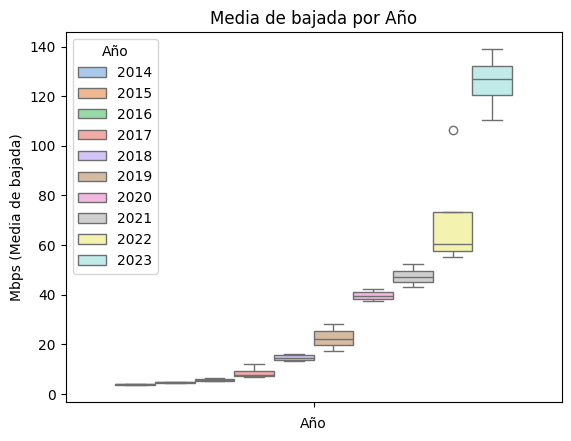

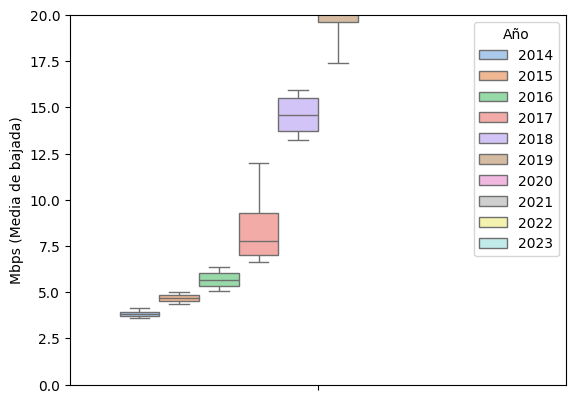

In [89]:
# Total vmd
sns.boxplot(data=df_total_vmd, y="Mbps (Media de bajada)",hue="Año",palette="pastel")
plt.title("Media de bajada por Año")
plt.xlabel("Año")
plt.show()
sns.boxplot(data=df_total_vmd, y="Mbps (Media de bajada)",hue="Año",palette="pastel") # Una mirada mas proximas a los datos de los primeros años
plt.ylim([0,20])
plt.show()

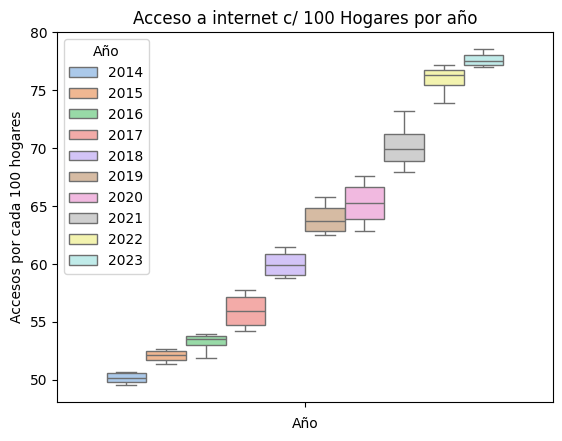

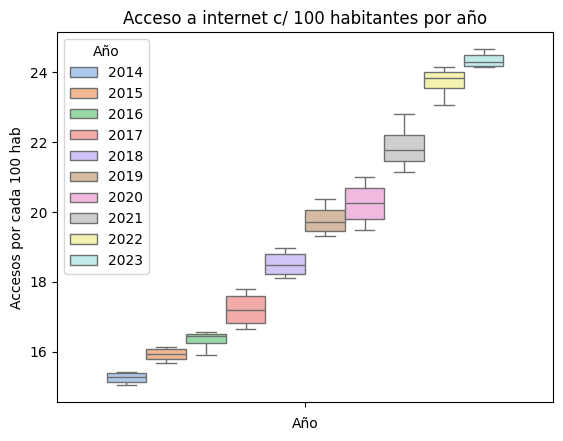

In [90]:
# Acceso a internet c/ 100 hogares
sns.boxplot(data=df_penetracion_total, y="Accesos por cada 100 hogares",hue="Año",palette="pastel")
plt.title("Acceso a internet c/ 100 Hogares por año")
plt.xlabel("Año")
plt.show()


# Acceso a internet c/ 100 personas
sns.boxplot(data=df_penetracion_total, y="Accesos por cada 100 hab",hue="Año",palette="pastel")
plt.title("Acceso a internet c/ 100 habitantes por año")
plt.xlabel("Año")
plt.show()

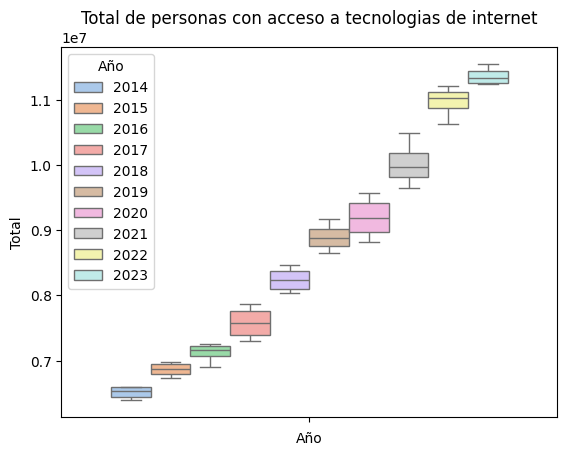

In [91]:
# Total acceso tecnologia
sns.boxplot(data=df_total_tech, y="Total",hue="Año",palette="pastel")
plt.title("Total de personas con acceso a tecnologias de internet")
plt.xlabel("Año")
plt.show()

### Observaciones
1. Se puede observar, agrupando por años, que los valores no presentan una variacion demasiado abrupta. El incremento es notorio con el pasar del tiempo, sin embargo, no presentan valores de caracteristica disruptiva bastante claros. 
2. Dentro de los graficos mostrados, los datos no presentan gran cantidad de outliers.

## Ingresos

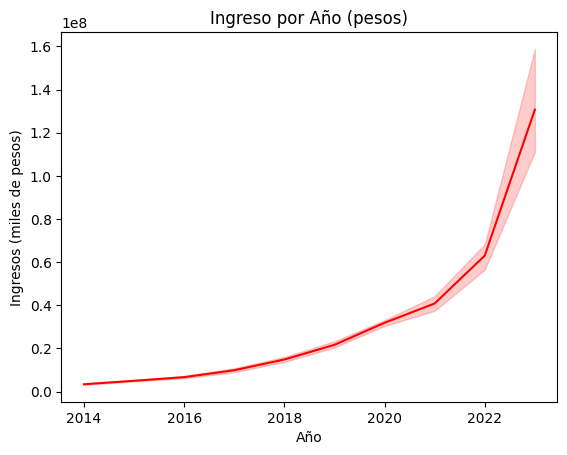

In [105]:
# Ingresos
sns.lineplot(data=df_ingresos, x="Año",y="Ingresos (miles de pesos)",color="red")
plt.xlabel("Año")
plt.title("Ingreso por Año (pesos)")
plt.show()

In [93]:
# De peso a dolares
valor_dolar=dolar()
df_dolares = pd.DataFrame(valor_dolar.items(), columns=["Año","Valor_Dolar"])
df_dolares["Año"] = df_dolares["Año"].astype("Int64")
df_dolares["Valor_Dolar"] = df_dolares["Valor_Dolar"].str.replace(",",".").astype(float)

In [94]:
# Se realiza un merge para unir los valores del dolar dependiendo el año
df_ingresos_dolar = pd.merge(df_ingresos,df_dolares,on="Año",how="inner")
df_ingresos_dolar["Ingresos_Dolar"] = round((df_ingresos_dolar["Ingresos (miles de pesos)"]/df_ingresos_dolar["Valor_Dolar"]),2)

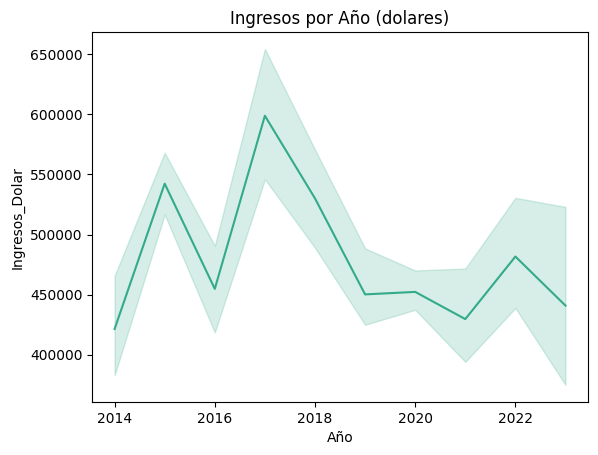

In [104]:
#Ingresos Dolar
fig,axes= plt.subplots()
sns.lineplot(data=df_ingresos_dolar, x="Año",y="Ingresos_Dolar",color="#33aa89")
plt.title("Ingresos por Año (dolares)")
plt.xlabel("Año")
plt.show()

#### Observacion del dataset ingresos:
1. Debido a que Argentina se enfrenta con una inflacion desde hace muchos años, la columna `Ingresos (miles de pesos)` fue tranformada a dolares (valor oficial) basandonos en el valor promedio del mismo en el año, ya que esta moneda es más estable en el tiempo. Los indices de inflacion de ambas monedas se pueden ver en los siguientes enlaces: <a href="https://es.tradingeconomics.com/argentina/inflation-rate-mom">inflacion Argentina</a>, <a href="https://es.tradingeconomics.com/united-states/inflation-cpi">inflacion Estados Unidos</a>.
2. Una vez pasado los valor a dolares, se pudo observar como los ingresos no aumentaron todos los años, como efectivamente se vio cuando los valores se encontraban en pesos.

### Comparacion de tecnologias Dial-Up y Banda Ancha Fija (BAf)

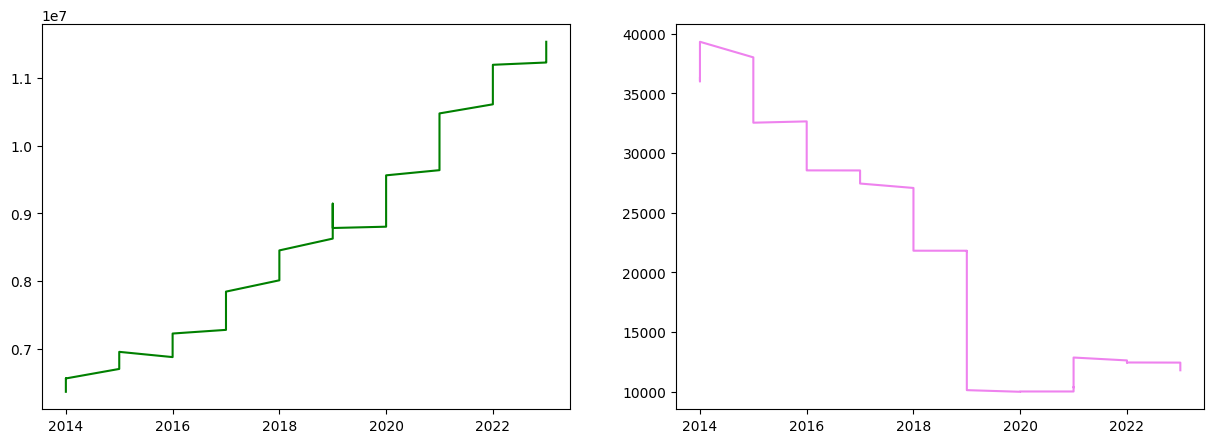

In [96]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(df_total_dial_baf["Año"],df_total_dial_baf["Banda ancha fija"],color="Green")
ax[1].plot(df_total_dial_baf["Año"],df_total_dial_baf["Dial up"],color="Violet")
plt.show()

### Observaciones
* Se puede analizar a simple viste el marcado crecimiento de la banda ancha fija y el decrecimiento de la tecnologia Dial Up, siendo cada vez menos frecuente su uso en el pais. Mediante estos graficos, dirigiremos nuestro analisis a tecnologias de banda ancha fija

### Deteccion de valores Repetidos o incongruencias

In [97]:
datos = [df_acceso_tech,df_acceso_vel,df_penetracion_hogares,df_penetracion_poblacion,df_vel_prom_prov]
for i,dato in enumerate(datos):
    print(f"DATAFRAME N° {i+1}")
    print("Cantidad de provincias:",dato["Provincia"].nunique())
    print("Cantidad de Duplicados:", dato[dato.duplicated()].shape[0])

DATAFRAME N° 1
Cantidad de provincias: 24
Cantidad de Duplicados: 0
DATAFRAME N° 2
Cantidad de provincias: 24
Cantidad de Duplicados: 0
DATAFRAME N° 3
Cantidad de provincias: 24
Cantidad de Duplicados: 0
DATAFRAME N° 4
Cantidad de provincias: 24
Cantidad de Duplicados: 0
DATAFRAME N° 5
Cantidad de provincias: 24
Cantidad de Duplicados: 0


In [98]:
datos = [df_total_tech,df_total_vel,df_penetracion_total,df_total_vmd,df_ingresos_dolar]
for i,dato in enumerate(datos):
    print(f"DATAFRAME N° {i+1}")
    print("Cantidad de Duplicados:", dato[dato.duplicated()].shape[0])

DATAFRAME N° 1
Cantidad de Duplicados: 0
DATAFRAME N° 2
Cantidad de Duplicados: 0
DATAFRAME N° 3
Cantidad de Duplicados: 0
DATAFRAME N° 4
Cantidad de Duplicados: 0
DATAFRAME N° 5
Cantidad de Duplicados: 0


### Observaciones
- Los dataframes que contienen la columna `Provincia`, no presenta alteraciones con respecto a la cantidad de provincias, valga la redundancia (Argentina cuenta con 23 provincias y un distrito federal, la Ciudad Autonoma de Buenos Aires, su aproximacion de 24 provincias es correcta). Tampoco presentan valores duplicados 
- Los dataframes restantes no presentan duplicados. 

### Provincias con mayor acceso a tecnologia

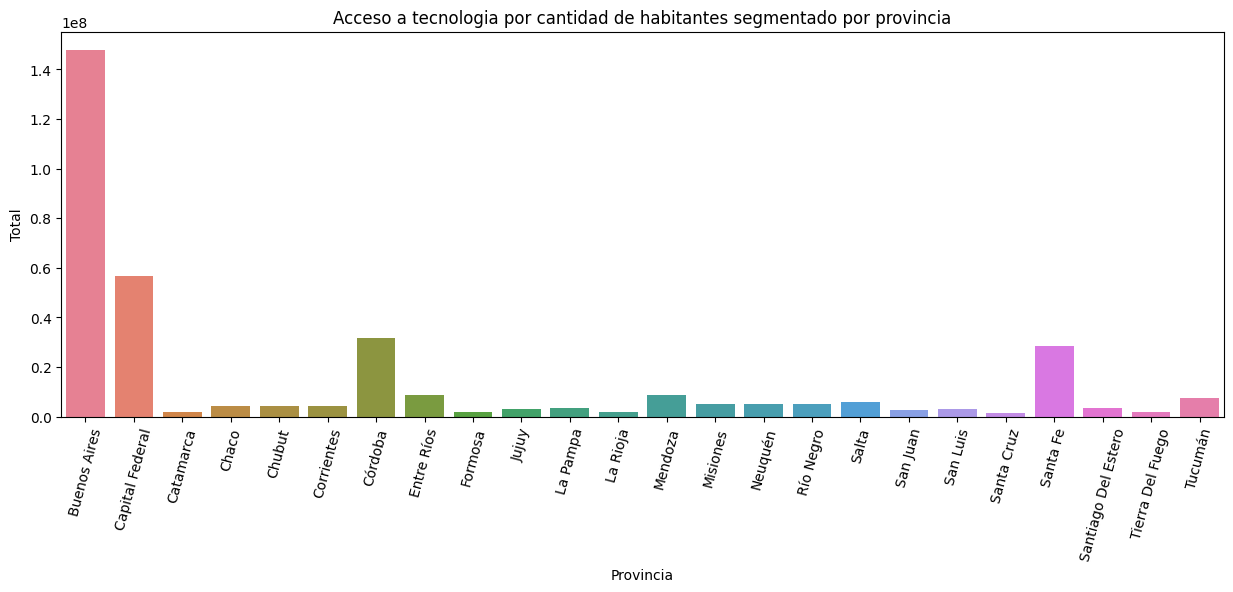

In [99]:
fig,axes=plt.subplots(figsize=(15,5))
totales_provincia=pd.DataFrame(df_acceso_tech.groupby("Provincia")["Total"].sum()).reset_index()
sns.barplot(data=totales_provincia,x="Provincia", y="Total",hue="Provincia")
plt.xticks(rotation=75)
plt.title("Acceso a tecnologia por cantidad de habitantes segmentado por provincia")
plt.show()

### Provincias con mayor acceso por poblacion y por hogar, medido por el promedio

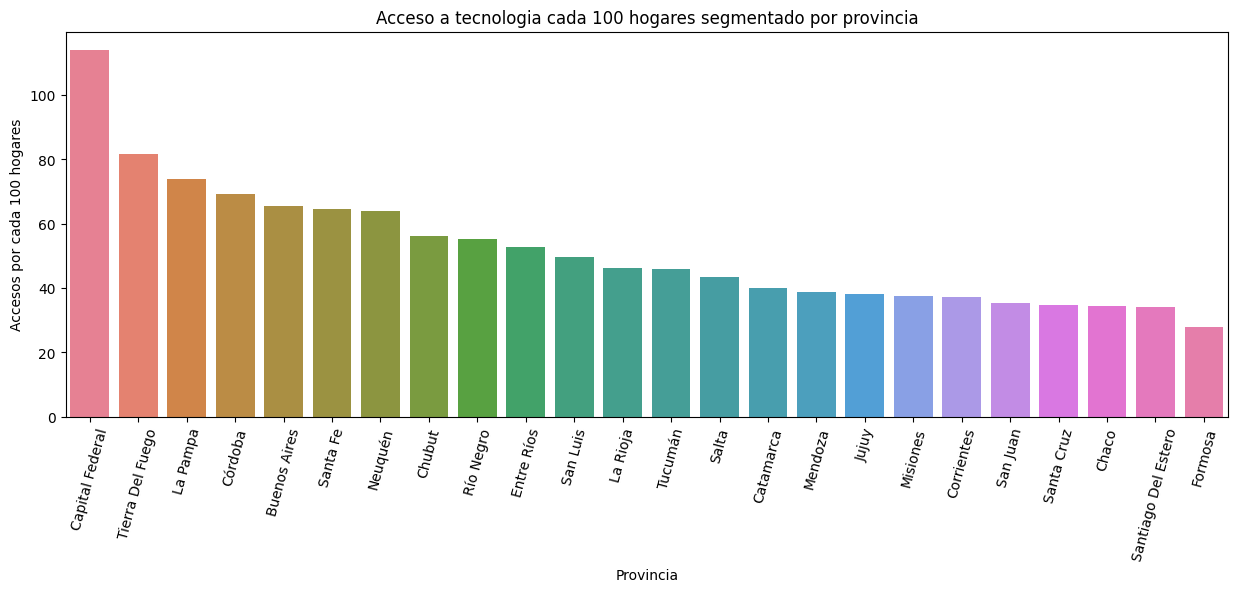

In [100]:
# Hogar
fig,axes=plt.subplots(figsize=(15,5))
totales_provincia=pd.DataFrame(df_penetracion_hogares.groupby("Provincia")["Accesos por cada 100 hogares"].mean()).reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)
sns.barplot(data=totales_provincia,x="Provincia", y="Accesos por cada 100 hogares",hue="Provincia")
plt.xticks(rotation=75)
plt.title("Acceso a tecnologia cada 100 hogares segmentado por provincia")
plt.show()

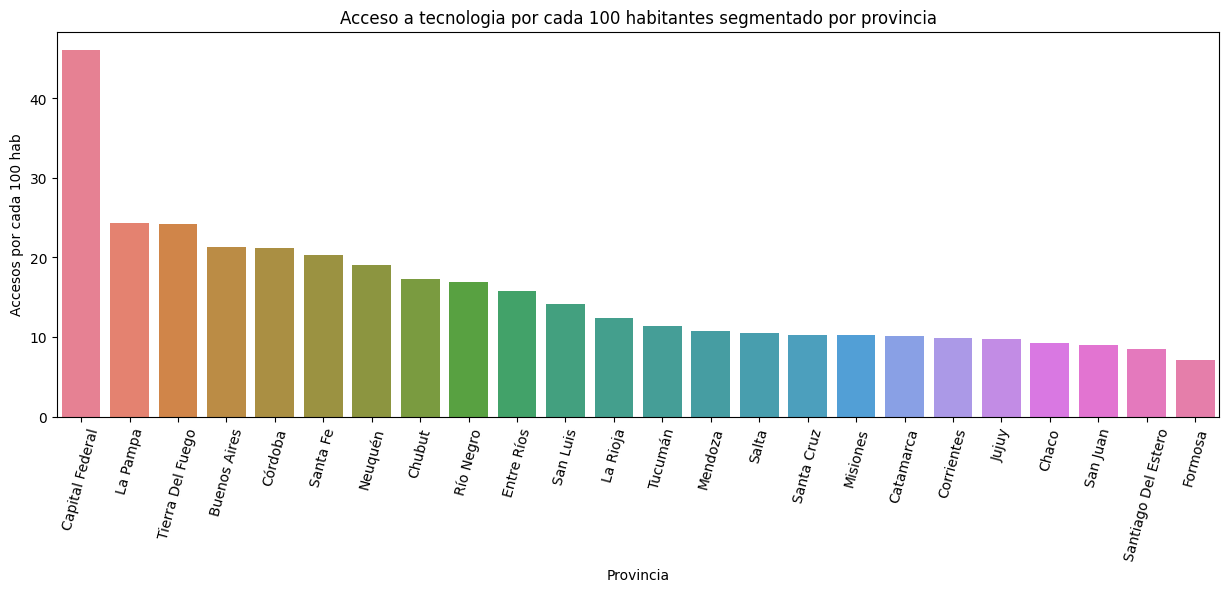

In [101]:
# Hogar
fig,axes=plt.subplots(figsize=(15,5))
totales_provincia=pd.DataFrame(df_penetracion_poblacion.groupby("Provincia")["Accesos por cada 100 hab"].mean()).reset_index().sort_values(by="Accesos por cada 100 hab",ascending=False)
sns.barplot(data=totales_provincia,x="Provincia", y="Accesos por cada 100 hab",hue="Provincia")
plt.xticks(rotation=75)
plt.title("Acceso a tecnologia cada 100 habitantes segmentado por provincia")
plt.show()

### Velocidad media por provincia (ponderando todos los año juntos)

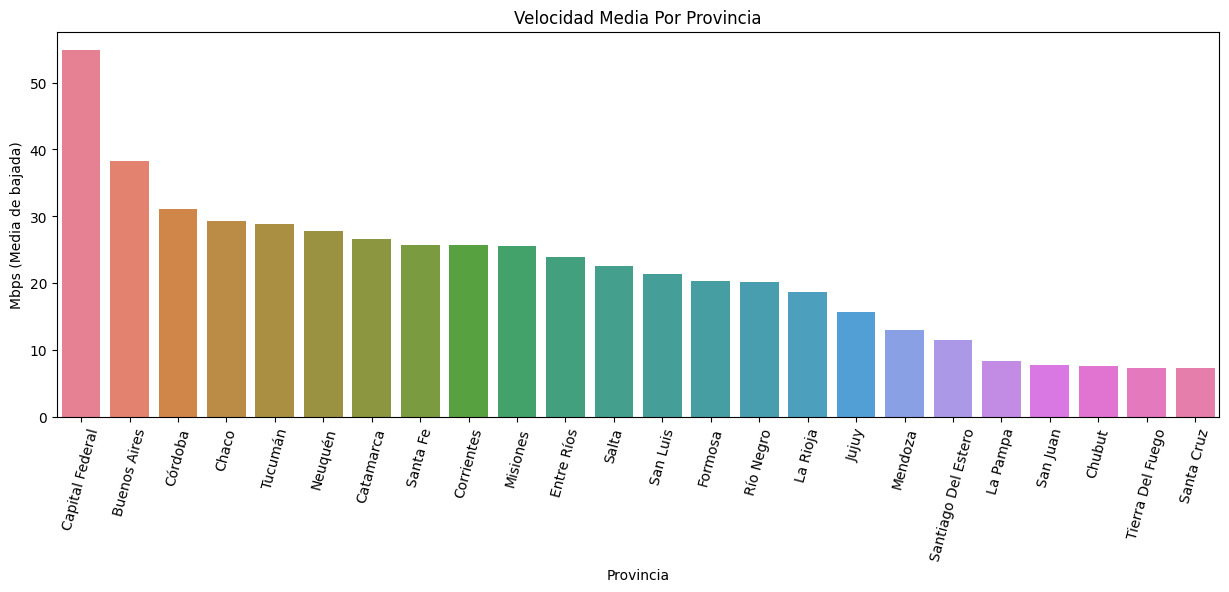

In [102]:
# Velocidad Media por Provincia
fig,axes=plt.subplots(figsize=(15,5))
totales_provincia=pd.DataFrame(df_vel_prom_prov.groupby("Provincia")["Mbps (Media de bajada)"].mean()).reset_index().sort_values(by="Mbps (Media de bajada)",ascending=False)
sns.barplot(data=totales_provincia,x="Provincia", y="Mbps (Media de bajada)",hue="Provincia")
plt.xticks(rotation=75)
plt.title("Velocidad Media Por Provincia")
plt.show()

### Observaciones
1. Se puede observar que Capital Federal y Buenos Aires lideran por sobre las demas provincias cuando nos basamos en la cantidad total de habitantes con acceso a tecnologia.
2. Si cambiamos el plano a 100 habitantes o cada 100 hogares, la grafica presenta una mayor distribucion, sin embargo, capital federal sigue liderando las estadisticas.
3. En el ultimo gráfico se puede analizar que algunas provincias, que se encontraban mejor posicionadas cuando se trataba de los graficos de `Accesos por cada 100 hogares` y `Accesos por cada 100 hab`, bajan notablemente su posicion en la tabla cuando se trata de la `velocidad media`.

### Instrumentos de conexion a internet 

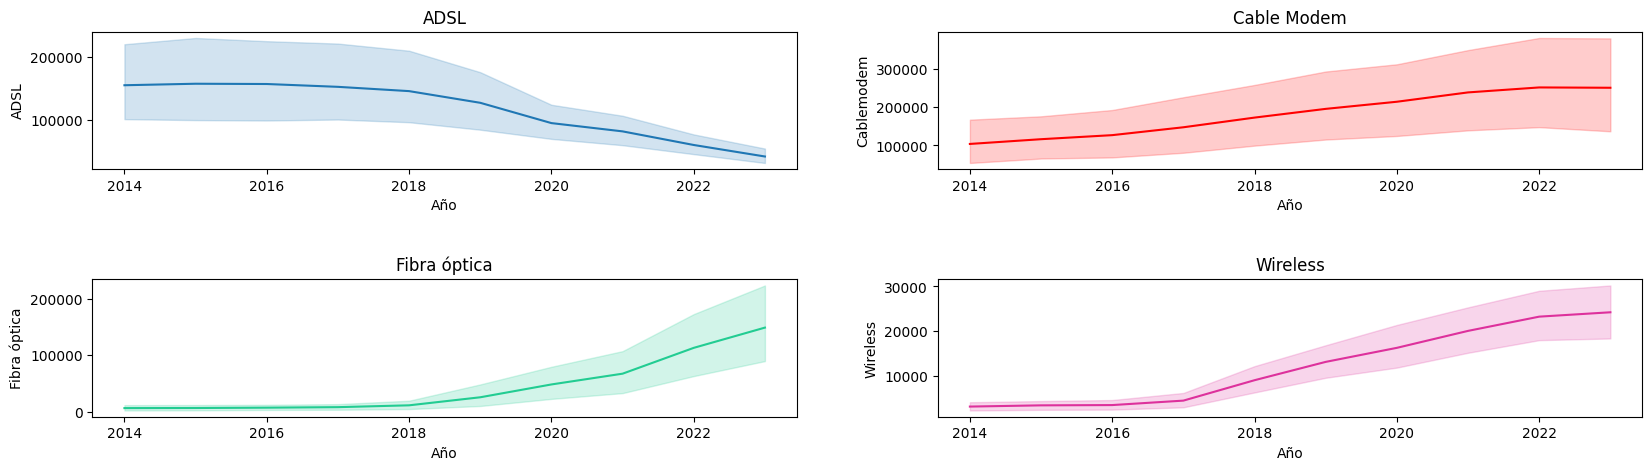

In [103]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(20,5))
plt.subplots_adjust(hspace=0.8) 
ax[0,0].set_title("ADSL")
sns.lineplot(data=df_acceso_tech, x="Año",y="ADSL", ax=ax[0,0])

ax[0,1].set_title("Cable Modem")
sns.lineplot(data=df_acceso_tech, x="Año",y="Cablemodem",ax=ax[0,1],color="red")


ax[1,0].set_title("Fibra óptica")
sns.lineplot(data=df_acceso_tech, x="Año",y="Fibra óptica",ax=ax[1,0],color="#22cc92")

ax[1,1].set_title("Wireless")
sns.lineplot(data=df_acceso_tech, x="Año",y="Wireless",ax=ax[1,1],color="#dd319c")

plt.show()

### Observaciones
1. Dentro del abanico de opciones que tenemos para acceder a internet, se puede observar que el grafico de `ADSL` es aquel que presenta una mayor caida. Esto podria significar que la gente opta por otra eleccion dentro las tecnologias del mercado. 
2. Se observa que los campos `fibra optica` y `wireless` han tenido un destacado aumento con el pasar de los año. Se podria sugerir, que son la tecnologia del momento, las cuales habria que hacerle más enfasis.

# <div style="text-align:center"> Exportar dato a MySQL
<div style="text-align:center"> <img src="../img/mysql.jpeg"> </div>
 </div>

In [61]:
from sqlalchemy import create_engine
import pymysql
password_sql =os.getenv("PASSWORD")
conexion = os.getenv("CONNECTION")
try:
    # Reemplazo los valores para que puedas llevar estos dataframes a tu propia base de datos
    conexion = pymysql.connect(
    host= 'localhost',        
    user= 'root', # Reemplazar si asi es el caso
    password= password_sql, #Reemplazar si asi es el caso
    database= 'telecomunicaciones' #Reemplazar si asi es el caso
    )
    connect = create_engine(conexion) #mysql+pymysql://<user>:<password>@<host>:<puerto>/<database>
except:
    print("No se pudo conectar")

# Cantidad de personas que tienen acceso a cierta tecnologica, dividido por provincias, año y trimestre
df_acceso_tech.to_sql(name="acceso_tech",con=connect ,if_exists="replace",index= False) 

# Cantidad de personas que tienen acceso a cierta velocidad de internet, dividido por provincias, año y trimestre
df_acceso_vel.to_sql(name="acceso_vel",con=connect ,if_exists="replace",index= False) 

# Totales de accesos a internet desglosados por velocidad de conexión.
df_total_vel.to_sql(name="total_vel",con=connect ,if_exists="replace",index= False) 

# Ingresos por trimestre y año
df_ingresos_dolar.to_sql(name="ingresos",con=connect ,if_exists="replace",index= False) 

# Número de accesos a Internet por cada 100 hogares en la provincia
df_penetracion_hogares.to_sql(name="penetracion_hogares",con=connect ,if_exists="replace",index= False) 

# Número de accesos a Internet por cada 100 habitantes de la provincia
df_penetracion_poblacion.to_sql(name="penetracion_poblacion",con=connect ,if_exists="replace",index= False) 

# Totales de velocidad media descargada (VMD).
df_total_vmd.to_sql(name="total_vel_media",con=connect ,if_exists="replace",index= False) 

# Velocidad promedio por provincia
df_vel_prom_prov.to_sql(name="vel_media_prov",con=connect ,if_exists="replace",index= False) 

# Combinacion de df_penetracion_poblacion  y df_penetracion_hogares
df_penetracion_total.to_sql(name="penetracion_total",con=connect ,if_exists="replace",index= False) 

# Total acceso a la tecnologia
df_total_tech.to_sql(name="total_acceso_tech",con=connect ,if_exists="replace",index= False) 


# Accesos dial-up y Banda Ancha Fija (BAf) por provincia, año y trimestre.
df_dial_baf.to_sql(name="dial_baf",con=connect ,if_exists="replace",index= False) 

# Totales de accesos dial-up y Banda Ancha Fija (BAf).
df_total_dial_baf.to_sql(name="total_dial_baf",con=connect ,if_exists="replace",index= False) 

40

## Seleccion de <b>KPIs</b>

Debido a que nuestro objetivo planteado es mejorar el desempeño y el servicio, los <i>KPIs</i> siguientes, corresponderan a buscar un aumento los siguientes apartados:

1. - *Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia*.
La fórmula es la siguiente:

 $`KPI = ((Nuevos Accesos - AccesoAntiguoTrimestre) / AccesoAntiguoTrimestre) * 100`$

2. - *Aumentar en un 10% la velocidad promedio de bajada por provincia, para el siguiente trimestre.* La formula es la siguiente: <br>

 $`KPI = ((Nueva Media - Media Antiguo Trimestre) / Media Antiguo Trimestre) * 100`$

3. - *Incrementar en un 10% y un 8% el acceso a fibra optica y wireless respectivamente, por provincia*. La formula es la siguiente: <br>
 
 $`KPI = ((Accesos Nuevo Trimestre - Accesos Antiguo Trimestre) / Accesos Antiguo Trimestre) * 100`$